Activate virtual environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sqlite3

CLEANING DATASET 1

In [2]:
schools_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\ELSI_excel_export_6389684883881608374860.xls', skiprows=6)


In [3]:
schools_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150007 entries, 0 to 150006
Data columns (total 3 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   School Name                                       150004 non-null  object
 1   State Name [Public School] Latest available year  150000 non-null  object
 2   State Abbr [Public School] Latest available year  150000 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


In [4]:


schools_df.isna().sum()


School Name                                         3
State Name [Public School] Latest available year    7
State Abbr [Public School] Latest available year    7
dtype: int64

In [5]:
#Dropping NAs since there aren't that many
schools_df = schools_df.dropna()
schools_df 
schools_df.isna().sum()

School Name                                         0
State Name [Public School] Latest available year    0
State Abbr [Public School] Latest available year    0
dtype: int64

In [6]:
#Cleaning up column names

schools_df.rename(columns={'State Abbr [Public School] Latest available year':'state_abbr'}, inplace=True)
schools_df.rename(columns={'State Name [Public School] Latest available year':'state_name'}, inplace=True)
schools_df.rename(columns={'School Name':'school_name'}, inplace=True)
schools_df

,school_name,state_name,state_abbr
0,014 FRIDLEY TS,Minnesota,MN
1,03-MM,Florida,FL
2,1 LT CHARLES W. WHITCOMB SCHOOL,Massachusetts,MA
3,1 SCHOOL ...,New York,NY
4,100 ACADEMY OF ENGINEERING AND TECHNOLOGY ES,Nevada,NV
...,...,...,...
149995,VAN BUREN COUNTY COMMUNITY SCHOOL DISTRICT HAR...,IOWA,IA
149996,VAN BUREN DISTRICT SECONDARY SCH,Maine,ME
149997,VAN BUREN EARLY COLLEGE HEALTH ALLIANCE,Michigan,MI
149998,VAN BUREN EL,Texas,TX


In [7]:
schools_df.duplicated().sum()
schools_df['school_name'].duplicated().sum()


np.int64(25952)

Discovered many duplicates due to schools having multiple entries based on grades offered

In [8]:
schools_df[schools_df.duplicated()].head(10)

,school_name,state_name,state_abbr
15,118-E-SW-5,FLORIDA,FL
262,601 SCHOOL,California,CA
263,601 SCHOOL,California,CA
284,72 E W 7,FLORIDA,FL
383,A F MALONEY,Massachusetts,MA
396,A J JORDAK ELEMENTARY SCHOOL,Ohio,OH
415,A L P H A CAMPUS,Texas,TX
416,A L P H A CAMPUS,Texas,TX
417,A L P H A CAMPUS,Texas,TX
418,A L P H A CAMPUS,Texas,TX


Removing duplicates where the state and corresponding school are accoutned for.  

In [9]:
unique_schools_df = schools_df.drop_duplicates(subset=['school_name', 'state_name'], keep='first')

print (len(schools_df))
print(len(unique_schools_df))

unique_schools_df.head(50)

150000
138231


,school_name,state_name,state_abbr
0,014 FRIDLEY TS,Minnesota,MN
1,03-MM,Florida,FL
2,1 LT CHARLES W. WHITCOMB SCHOOL,Massachusetts,MA
3,1 SCHOOL ...,New York,NY
4,100 ACADEMY OF ENGINEERING AND TECHNOLOGY ES,Nevada,NV
5,100 ACADEMY OF ENGINEERING AND TECHNOLOGY MS,Nevada,NV
6,100 BLACK MEN OF THE BAY AREA COMMUNITY,California,CA
7,100 LEGACY ACADEMY CHARTER SCHOOL,New Jersey,NJ
8,100 R ELEMENTARY SCHOOL,Nebraska,NE
9,101 ELEMENTARY ...,California,CA


In [10]:
#Gouping by state abbreviation and then counting the # of schools within each state
school_counts_state = unique_schools_df.groupby('state_abbr').size().reset_index(name='num_schools')

school_counts_state

,state_abbr,num_schools
0,AK,672
1,AL,1974
2,AR,1646
3,AS,34
4,AZ,3465
5,BI,259
6,CA,12467
7,CO,2344
8,CT,1572
9,DC,446


CLEANING DATASET 2  
Manually removed unwated columns using excel decreasing total columns from 930 to 120

In [11]:
census_df = pd.read_csv(r'C:\Users\molly\projects\farm_to_school\data\F2S_Census_2023_edited.csv')

census_df.info()

census_df.isna().sum()

print(census_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Columns: 120 entries, CASEID to Q13C14
dtypes: float64(100), int64(15), object(5)
memory usage: 10.3+ MB
(11262, 120)


In [12]:
census_df.head(10)

,CASEID,RGN,RGN_TXT,SFA_NAME,SFA_STATE,SFA_ZIP,SFA_ID,NUM_SCHOOLS,NUM_STUDENTS,Q2C1,...,Q13C5,Q13C6,Q13C7,Q13C8,Q13C9,Q13C10,Q13C11,Q13C12,Q13C13,Q13C14
0,MARO1100174,1,Mid-Atlantic Regional Office (MARO),Dc Public Schools (Dcps),DC,20002.0,1,118.0,49869.0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,MARO1100179,1,Mid-Atlantic Regional Office (MARO),Dc Bilingual Public Charter School,DC,20011.0,114,1.0,492.0,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,MARO1100181,1,Mid-Atlantic Regional Office (MARO),El Haynes Public Charter School,DC,20011.0,116,3.0,1241.0,1,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,MARO1100182,1,Mid-Atlantic Regional Office (MARO),Eagle Academy Pcs,DC,20003.0,117,2.0,526.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MARO1100183,1,Mid-Atlantic Regional Office (MARO),Early Childhood Academy Pcs,DC,20032.0,118,1.0,235.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,MARO1100184,1,Mid-Atlantic Regional Office (MARO),Briya Pcs,DC,20009.0,119,4.0,65.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6,MARO1100185,1,Mid-Atlantic Regional Office (MARO),Friendship Pcs,DC,20001.0,120,9.0,4495.0,1,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,MARO1100186,1,Mid-Atlantic Regional Office (MARO),Hope Community Pcs,DC,20017.0,121,1.0,281.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,MARO1100188,1,Mid-Atlantic Regional Office (MARO),Cedar Tree Academy Pcs,DC,20020.0,123,1.0,480.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MARO1100189,1,Mid-Atlantic Regional Office (MARO),Howard Univ. Middle School,DC,20059.0,124,1.0,188.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyzing NAs and trying to figure out what to do with them

In [13]:
q_cols = [col for col in census_df.columns if col.startswith("Q")] #focusing on the answeres within the question columns

rows_all_na = census_df[q_cols].isna().all(axis=1)

print(rows_all_na.sum())


0


Seeing where there are no rows with all NAs meaning that the each school listed has some sort of response.  However, I know that there are a lot of NAs in the dataset so figuring out another way to identify them

In [14]:
#Counts how many Q columns are NA in each row
census_df['na_count_Q'] = census_df[q_cols].isna().sum(axis=1)
print(census_df['na_count_Q'].describe())

#Defining threshold of < 50 % (actual = 50.5%)
threshold = len(q_cols) / 2

# # of rows with more than half of Q columns missing
mostly_na_rows = census_df[census_df['na_count_Q'] > threshold] 

print({len(mostly_na_rows)})


count    11262.000000
mean        35.849405
std         15.916298
min          7.000000
25%         27.000000
50%         28.000000
75%         36.000000
max         97.000000
Name: na_count_Q, dtype: float64
{1641}


In [15]:
census_df.loc[census_df['na_count_Q'] > 55.5, q_cols].head(10)

,Q2C1,Q2C2,Q2C3,Q2C4,Q2C5,Q2C6,Q2C7,Q5C1,Q5C2,Q5C3,...,Q13C5,Q13C6,Q13C7,Q13C8,Q13C9,Q13C10,Q13C11,Q13C12,Q13C13,Q13C14
8,1,0,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,1,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1,1,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0,0,0,0,0,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,1,1,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,0,0,0,0,0,0,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


About 15% of the rows have more than half of the question columns as NA.  I don't want to eliminate the answers that were provided though. I will plan to "skipna" in my analysis rather than eliminating these columns.

Now looking for columns with all 0 or answered 'No' to a question

In [16]:
col_all_0 = (census_df[q_cols] == 0).all(axis=1)

count_all_0 = col_all_0.sum()

print(count_all_0)

0


In [17]:
#Converting column type to integer
census_df['SFA_ZIP'] = census_df['SFA_ZIP'].astype('Int64')

print(census_df['SFA_ZIP'].dtype)
print(census_df['SFA_ZIP'].head(10))

Int64
0    20002
1    20011
2    20011
3    20003
4    20032
5    20009
6    20001
7    20017
8    20020
9    20059
Name: SFA_ZIP, dtype: Int64


In [ ]:
def clean_census(df, state_col='SFA_STATE', to_upper=True)
    
    

In [18]:
#Grouping the schools by state abrv (same done previously for school df)  
wk_census_df = (
    census_df[['NUM_SCHOOLS', 'NUM_STUDENTS', 'SFA_STATE']]
    .groupby('SFA_STATE')[['NUM_SCHOOLS', 'NUM_STUDENTS']]
    .sum()
    .reset_index())
#Renaming columns
wk_census_df.rename(columns={
    'SFA_STATE': 'census_state',
    'NUM_SCHOOLS': 'census_schools',
    'NUM_STUDENTS': 'census_students'
}, inplace=True)

wk_census_df



,census_state,census_schools,census_students
0,AK,171.0,32948.0
1,AL,1102.0,572819.0
2,AR,754.0,349494.0
3,AS,36.0,0.0
4,AZ,1179.0,680208.0
5,CA,7681.0,3948195.0
6,CO,1625.0,773553.0
7,CT,660.0,308031.0
8,DC,181.0,70283.0
9,DE,195.0,118287.0


In [19]:
#Function to remove spaces and cleanup state abbreviations
def clean_columns(df, column_name, to_upper=False): 
    df[column_name] = df[column_name].astype(str).str.strip()
    if to_upper:
        df[column_name] = df[column_name].str.upper()

    return df


wk_census_df = clean_columns(wk_census_df, 'census_state', to_upper=True)
school_counts_state = clean_columns(school_counts_state, 'state_abbr') 



Joining school data

In [20]:
merged_df = pd.merge(wk_census_df, school_counts_state, left_on='census_state', right_on='state_abbr', how='left', indicator=True)

merged_df.head(10)

,census_state,census_schools,census_students,state_abbr,num_schools,_merge
0,AK,171.0,32948.0,AK,672,both
1,AL,1102.0,572819.0,AL,1974,both
2,AR,754.0,349494.0,AR,1646,both
3,AS,36.0,0.0,AS,34,both
4,AZ,1179.0,680208.0,AZ,3465,both
5,CA,7681.0,3948195.0,CA,12467,both
6,CO,1625.0,773553.0,CO,2344,both
7,CT,660.0,308031.0,CT,1572,both
8,DC,181.0,70283.0,DC,446,both
9,DE,195.0,118287.0,DE,323,both


Removing territories

In [21]:
remove_territories = ['AS', 'PR', 'GU', 'BI', 'VI', 'DO', 'DD', 'MP'] 

merged_df = merged_df[~merged_df['state_abbr'].isin(remove_territories)].reset_index(drop=True)

merged_df.head(10)



,census_state,census_schools,census_students,state_abbr,num_schools,_merge
0,AK,171.0,32948.0,AK,672,both
1,AL,1102.0,572819.0,AL,1974,both
2,AR,754.0,349494.0,AR,1646,both
3,AZ,1179.0,680208.0,AZ,3465,both
4,CA,7681.0,3948195.0,CA,12467,both
5,CO,1625.0,773553.0,CO,2344,both
6,CT,660.0,308031.0,CT,1572,both
7,DC,181.0,70283.0,DC,446,both
8,DE,195.0,118287.0,DE,323,both
9,FL,2413.0,1765344.0,FL,5890,both


Final data frames summarized

In [22]:
#All schools in the US
schools_df 
#All schools in the US by state
unique_schools_df 
#Entire census dataset 
census_df 
#Subset of census df with questions removed, used for the join
wk_census_df 
#Join of unique schools and wk census
merged_df 


,census_state,census_schools,census_students,state_abbr,num_schools,_merge
0,AK,171.0,32948.0,AK,672,both
1,AL,1102.0,572819.0,AL,1974,both
2,AR,754.0,349494.0,AR,1646,both
3,AZ,1179.0,680208.0,AZ,3465,both
4,CA,7681.0,3948195.0,CA,12467,both
5,CO,1625.0,773553.0,CO,2344,both
6,CT,660.0,308031.0,CT,1572,both
7,DC,181.0,70283.0,DC,446,both
8,DE,195.0,118287.0,DE,323,both
9,FL,2413.0,1765344.0,FL,5890,both


Weighting the census responses to be representative of total schools in each state

In [23]:

merged_df["weighted_schools"] = (merged_df['census_schools']/ merged_df['num_schools'])
merged_df = merged_df.copy()


Creating Relational Tables 

In [24]:
#Bringing in excel file with question text
data_dict_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\data_dictionary_f2s.edit.xlsx', sheet_name='Sheet2')
#Skipping header info in file
header_df = data_dict_df.iloc[:8] 

header_df.head(15)

questions_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\data_dictionary_f2s.edit.xlsx', sheet_name='Sheet2', header= 9)

questions_df.head(15)



,question_id,question_text,Unnamed: 2
0,Q2C1,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
1,Q2C2,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
2,Q2C3,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
3,Q2C4,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
4,Q2C5,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
5,Q2C6,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
6,Q2C7,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
7,Q5C1,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
8,Q5C2,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
9,Q5C3,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES


In [25]:
#Split the excel into 2 df
questions_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\data_dictionary_f2s.edit.xlsx', sheet_name='Sheet2', header= 9)

questions_df = questions_df.rename(columns={'Unnamed: 2' : "answer_options"})

questions_df.head(15)



,question_id,question_text,answer_options
0,Q2C1,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
1,Q2C2,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
2,Q2C3,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
3,Q2C4,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
4,Q2C5,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
5,Q2C6,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
6,Q2C7,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
7,Q5C1,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
8,Q5C2,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
9,Q5C3,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES


Writing the questions table into SQL

In [26]:
conn = sqlite3.connect('../survey.db')
#Auto-increment
questions_df['id'] = range(1, len(questions_df) + 1) 
#Adding the id column into the df
q_final_df = questions_df[['id', 'question_id', 'question_text']] 

q_final_df.to_sql("questions",conn, if_exists="replace", index=False) 



116

Creating the answer_options table

In [27]:
#clean up this box!!!!!!!!!!

df = questions_df

rows = []
#Loops through all rows in the df
for _, row in questions_df.iterrows():
    qid = row['question_id'] #Pulls the qid from each row
    opts = row['answer_options']#Pulls answer options 
    #splits anywhere there is a semicolon and removes extra spaces
    split = [o.strip() for o in opts.split(';')] 

    for s in split:
        if ' - ' in s:#Says that the hyphen is OK and to move through it
            code, label = s.split(' - ', 1)#Actually splits the options into the "code and label" designation, only split on the first instance of hyphen
            #Builing a new table with answer_options
            rows.append({ 
                'question_id': qid,
                'option_code': code.strip(),
                'option_text': label.strip()
            })

answer_options_df = pd.DataFrame(rows)

answer_options_df.to_sql("answer_options", conn, if_exists="replace", index=False)



241

Creating response table. 

In [28]:
#Using melt to reshape, 1 row per answer vs 1 row per case ID
responses_long = pd.melt( 
    census_df,
    id_vars=['CASEID'], #keeps this column as is 
    value_vars=q_cols, #this is the column that melts columns to rows
    var_name='question_id', #new melted column name
    value_name='answer'#answer to each question
)

#Adding in responseid column auto-incrementing *primary key
responses_long.insert(0, 'response_id', range(1, len(responses_long) + 1))
#Converting to string
responses_long['answer'] = responses_long['answer'].astype(str)
#Removing decimals and extra space
responses_long['answer'] = responses_long['answer'].str.replace(r'\.0$', '', regex=True)
responses_long['answer'] = responses_long['answer'].str.strip()

responses_long.to_sql("responses", conn, if_exists="replace", index=False)

1250082

Breaking down Q26 more deeply and creating a separate df for the responses to this Q

In [29]:
#Merging answer_options and responses for q26
merged = responses_long.merge(  
    answer_options_df,
    left_on=['question_id', 'answer'],
    right_on=['question_id', 'option_code'],
    how='inner'
)

q26_merged = merged[merged['question_id'] == 'Q26']
#Builindg a sumamry table
summary = q26_merged['option_text'].value_counts().reset_index()
summary.columns = ['option_text', 'num_responses']
#Calculate % 
total_responses = summary['num_responses'].sum() 
summary['pct_responses'] = (summary['num_responses'] / total_responses * 100).round(2)

summary = summary.sort_values('num_responses', ascending=False)
summary


summary.to_sql('q26_summary', conn, if_exists='replace', index=False)

11

Creating case id table

In [30]:
case_id = census_df[['CASEID', 'RGN', 'RGN_TXT', 'SFA_NAME', 'SFA_STATE', 'SFA_ZIP','SFA_ID', 'NUM_SCHOOLS', 'NUM_STUDENTS']]

case_id.to_sql("case_id", conn, if_exists="replace", index=False)




11262

Creating the schools table

In [31]:
schools = merged_df[['census_state', 'census_schools', 'census_students', 'state_abbr','num_schools', '_merge', 'weighted_schools']]

schools.to_sql("schools", conn, if_exists="replace", index=False)




51

SQL queries and Visuals

Understanding what "local" means to survey respondants

In [32]:
query1 = """SELECT
    *
    FROM q26_summary;
"""    
result1 = pd.read_sql(query1, conn)
result1["option_text"] = result1["option_text"].str.replace("PRODUCED WITHIN THE REGION (PLEASE SPECIFY WHAT YOU MEAN BY \"REGION\")", "PRODUCED WITHIN THE REGION", regex=False)
result1["option_text"] = result1["option_text"].str.replace("OTHER (PLEASE SPECIFY)", "OTHER", regex=False)
result1["option_text"] = result1["option_text"].str.replace("WE DON'T HAVE A SET DEFINITION FOR LOCAL", "NO SET DEFINITION FOR LOCAL", regex=False)
print(result1)

                          option_text  num_responses  pct_responses
0           PRODUCED WITHIN THE STATE           2733          24.27
1         NO SET DEFINITION FOR LOCAL           2491          22.12
2                        I DON'T KNOW           1849          16.42
3   PRODUCED WITHIN A 100 MILE RADIUS            959           8.52
4    PRODUCED WITHIN A 50 MILE RADIUS            883           7.84
5    PRODUCED WITHIN A 20 MILE RADIUS            565           5.02
6   PRODUCED WITHIN A 400 MILE RADIUS            481           4.27
7   PRODUCED WITHIN A 200 MILE RADIUS            472           4.19
8          PRODUCED WITHIN THE REGION            459           4.08
9          PRODUCED WITHIN THE COUNTY            288           2.56
10                              OTHER             82           0.73


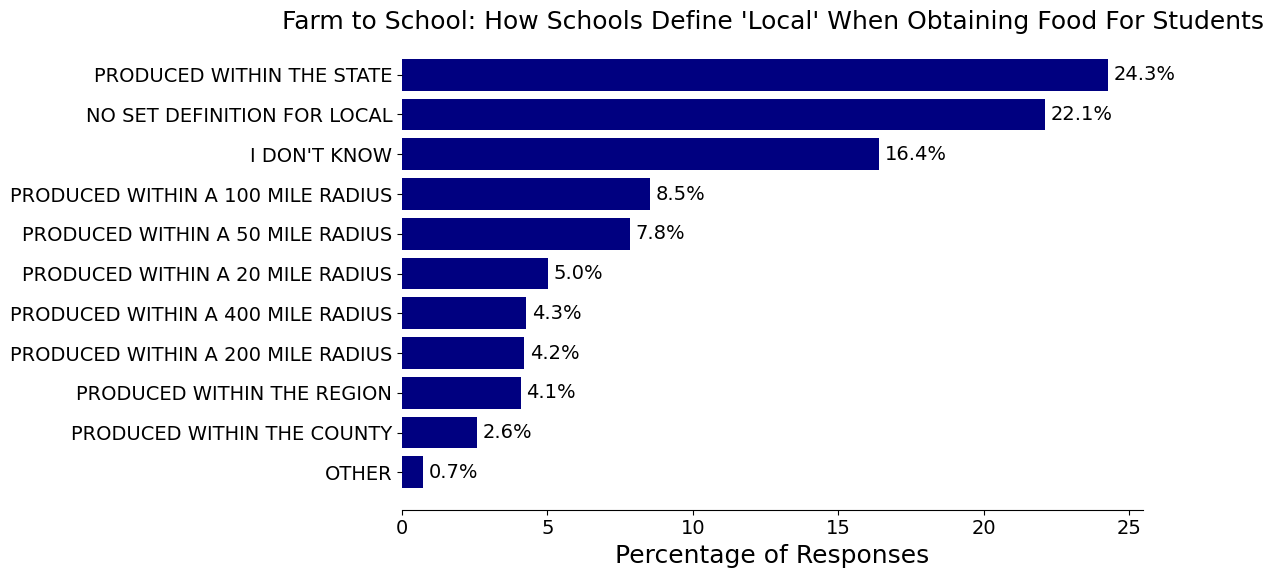

In [60]:
query1_df = result1.sort_values("pct_responses", ascending=True)

fig, ax = plt.subplots(figsize=(12,6))


bars = ax.barh(query1_df["option_text"], query1_df["pct_responses"], color="navy")

#Add percentage labels to each bar
for bar, pct in zip(bars, query1_df["pct_responses"]):
    ax.text(bar.get_width() + 0.2, 
            bar.get_y() + bar.get_height()/2,
            f"{pct:.1f}%", 
            va="center", 
            fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)  # keep x-axis if desired

ax.set_xlabel("Percentage of Responses", fontsize=18)
ax.set_title("Farm to School: How Schools Define 'Local' When Obtaining Food For Students", fontsize=18)
plt.tight_layout()
plt.show()

Exploring the top 10 States with highest ratio of respondants in the survey to overall schools in their state

In [34]:

query2 = """SELECT
    weighted_schools,
    census_schools,
    num_schools,
    state_abbr
FROM schools
WHERE state_abbr <> 'HI' 
ORDER BY weighted_schools DESC
LIMIT 10;
"""
#HI skewing results due to # respondants= #of schools
result2 = pd.read_sql(query2, conn)
print(result2)


   weighted_schools  census_schools  num_schools state_abbr
0          0.761666          2432.0         3193         NC
1          0.731170           631.0          863         NV
2          0.715701          1878.0         2624         VA
3          0.698282          1870.0         2678         WI
4          0.693259          1625.0         2344         CO
5          0.684969          1235.0         1803         OR
6          0.681186          2252.0         3306         GA
7          0.673643           869.0         1290         UT
8          0.652838          1196.0         1832         KS
9          0.642558          1075.0         1673         SC


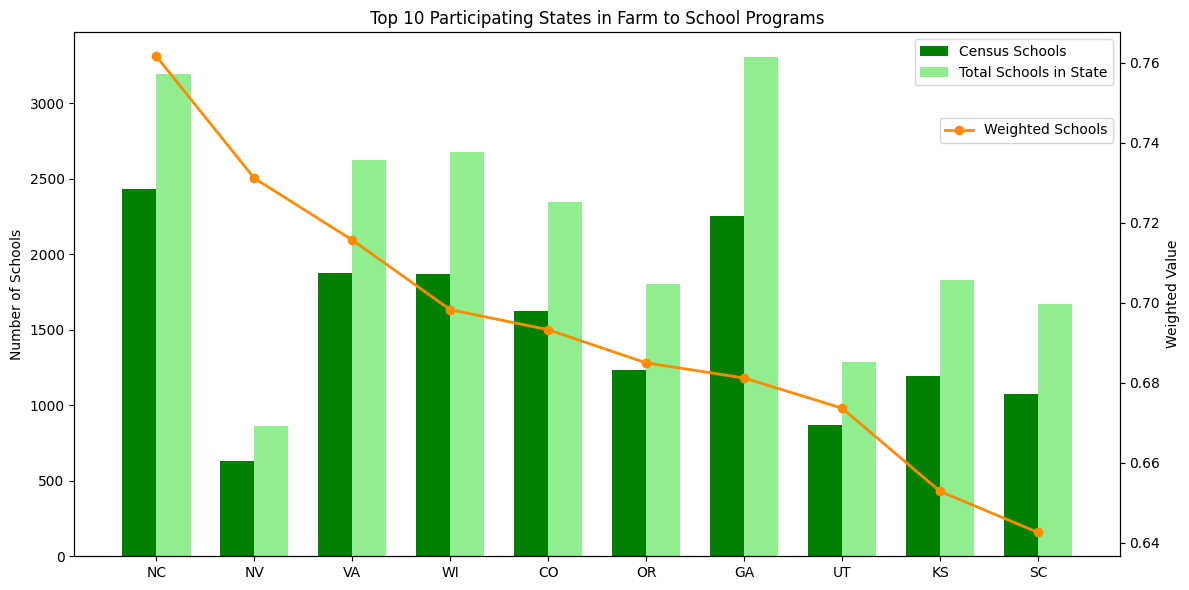

In [35]:
df = result2.sort_values("weighted_schools", ascending=False)

#Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))
x = range(len(df))   
bar_width = 0.35

#Bars for census and total schools
ax1.bar([i - bar_width/2 for i in x], df["census_schools"],
        width=bar_width, label="Census Schools", color="green")
ax1.bar([i + bar_width/2 for i in x], df["num_schools"],
        width=bar_width, label="Total Schools in State", color="lightgreen")

ax1.set_xticks(x)
ax1.set_xticklabels(df["state_abbr"])
ax1.set_ylabel("Number of Schools")
ax1.legend(loc="upper right", bbox_to_anchor=(1, 1))

#Secondary axis for weighted schools
ax2 = ax1.twinx()
ax2.plot(x, df["weighted_schools"], color="darkorange", marker="o",
         linewidth=2, label="Weighted Schools")
ax2.set_ylabel("Weighted Value")
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))

plt.title("Top 10 Participating States in Farm to School Programs")
plt.tight_layout()
plt.show()



Top 5 and Bottom 5 Census Respondants by State

In [57]:
query3 = """SELECT
    weighted_schools,
    census_schools,
    num_schools,
    state_abbr
FROM schools
WHERE state_abbr <> 'HI'
ORDER BY weighted_schools ASC;
"""
result3 = pd.read_sql(query3, conn)
print(result3)

    weighted_schools  census_schools  num_schools state_abbr
0           0.254464           171.0          672         AK
1           0.274588          1301.0         4738         MN
2           0.278630           236.0          847         ND
3           0.282963           191.0          675         NH
4           0.314094           702.0         2235         NE
5           0.321503           308.0          958         ME
6           0.336874           222.0          659         VT
7           0.340260          1179.0         3465         AZ
8           0.347385           445.0         1281         SD
9           0.362845           500.0         1378         MS
10          0.405830           181.0          446         DC
11          0.409677          2413.0         5890         FL
12          0.419174          2549.0         6081         MI
13          0.419847           660.0         1572         CT
14          0.428817          1247.0         2908         MO
15          0.435306    

C:\Users\molly\AppData\Local\Temp\ipykernel_20408\4091984339.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([abs(int(t)) for t in ax1.get_yticks()])


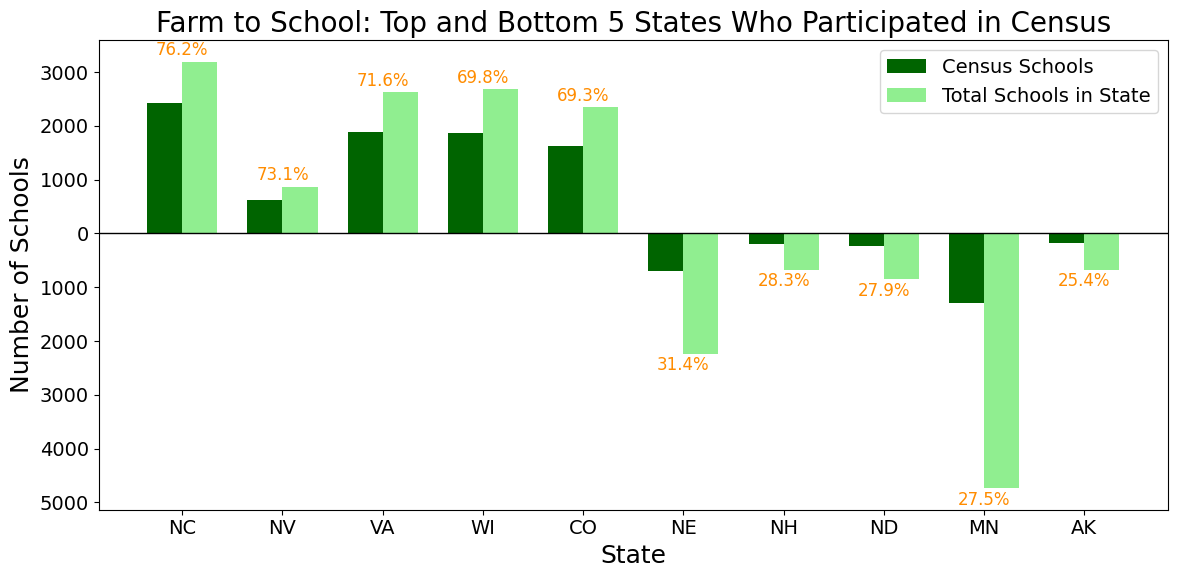

In [58]:
query2_df = result2.sort_values("weighted_schools", ascending=False)
query3_df = result3.sort_values("weighted_schools", ascending=False)

top5 = query2_df.head(5)
bottom5 = query3_df.tail(5)

#Flip bottom 5 bar values so they plot below x-axis
bottom5_plot = bottom5.copy()
bottom5_plot["census_schools"] = -bottom5_plot["census_schools"]
bottom5_plot["num_schools"] = -bottom5_plot["num_schools"]

#Combine into one DataFrame
subset_df = pd.concat([top5, bottom5_plot])

#Compute percentage coverage (always positive for labeling)
subset_df["coverage_pct"] = (subset_df["census_schools"].abs() / subset_df["num_schools"].abs()) * 100

#Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))
x = range(len(subset_df))
bar_width = 0.35

#Bars for census and total schools
bars1 = ax1.bar([i - bar_width/2 for i in x], subset_df["census_schools"],
                width=bar_width, label="Census Schools", color="darkgreen")
bars2 = ax1.bar([i + bar_width/2 for i in x], subset_df["num_schools"],
                width=bar_width, label="Total Schools in State", color="lightgreen")

ax1.set_xticks(x)
ax1.set_xticklabels(subset_df["state_abbr"])
ax1.set_ylabel("Number of Schools")
ax1.set_xlabel("State")
ax1.axhline(0, color="black", linewidth=1)  # baseline x-axis
ax1.legend(loc="upper right")

#Annotate bars with % coverage
for i, pct in enumerate(subset_df["coverage_pct"]):
    #Place label above or below depending on bar direction
    ypos = subset_df["num_schools"].iloc[i]
    offset = 50 if ypos > 0 else -50
    ax1.text(i, ypos + offset, f"{pct:.1f}%", ha="center", va="bottom" if ypos > 0 else "top", fontsize=12, color="darkorange")
    
#Adjust y-axis to show only positive tick labels
ax1.set_yticklabels([abs(int(t)) for t in ax1.get_yticks()])



plt.title("Farm to School: Top and Bottom 5 States Who Participated in Census")
plt.tight_layout()
plt.show()

**REMOVEBefore building my database, I determined the School Lunch and School Breakfast Programs are the most participated in programs based on survey results. I wanted to see if there was any increase in the use of local foods in these programs from school years 2022-2023 to 2023-2024 (Q7_A1C4 and Q7_A1C3, Q7_B1C4 and Q7_B1C3) 

In [38]:
#REMOVE

query4 = """SELECT
    q.question_id,
    r.question_id,
    r.answer
    FROM questions q
    JOIN responses r ON q.question_id = r.question_id
    WHERE q.question_id IN ('Q7_B1C4', 'Q7_B1C3')
    AND r.answer = 1;
"""
result4 = pd.read_sql(query4, conn)
print(result4)

     question_id question_id answer
0        Q7_B1C4     Q7_B1C4      1
1        Q7_B1C4     Q7_B1C4      1
2        Q7_B1C4     Q7_B1C4      1
3        Q7_B1C4     Q7_B1C4      1
4        Q7_B1C4     Q7_B1C4      1
...          ...         ...    ...
5340     Q7_B1C4     Q7_B1C4      1
5341     Q7_B1C4     Q7_B1C4      1
5342     Q7_B1C4     Q7_B1C4      1
5343     Q7_B1C4     Q7_B1C4      1
5344     Q7_B1C4     Q7_B1C4      1

[5345 rows x 3 columns]


Turns out, there were no respondants that used local food in the Lunch Program or Breakfast Program in 2022-2023

Questions response summary

In [39]:
query8 = """SELECT
    question_id,
    COUNT(*) AS total_responses
FROM responses
WHERE question_id IN ('Q9_CC1', 'Q9_CC2', 'Q9_CC3', 'Q9_CC4', 'Q8C1', 'Q8C9', 'Q10C1', 'Q10C2', 'Q10C3', 'Q10C4', 'Q13C1')
    AND answer = 1
GROUP BY question_id;
"""
result8 = pd.read_sql(query8, conn)
print(result8)


   question_id  total_responses
0        Q10C1              164
1        Q10C2               91
2        Q10C3              112
3        Q10C4               90
4        Q13C1             4646
5         Q8C1               85
6         Q8C9               80
7       Q9_CC1               94
8       Q9_CC2               68
9       Q9_CC3               10
10      Q9_CC4               12


Querying for question responses and joining with state associated with each response 

In [40]:
query9 = """SELECT 
    r.question_id,
    q.question_text,
    c.SFA_STATE,
    COUNT(*) AS total_responses
FROM responses r
LEFT JOIN questions q 
    ON r.question_id = q.question_id
LEFT JOIN case_id c
    ON r.CASEID = c.CASEID
WHERE r.question_id IN ('Q9_CC1', 'Q8C1', 'Q8C9', 'Q10C1', 'Q10C2', 'Q10C3', 'Q10C4', 'Q13C1')
  AND r.answer = 1
GROUP BY r.question_id, q.question_text, c.SFA_STATE
ORDER BY r.question_id, c.SFA_STATE;
"""

result9 = pd.read_sql(query9, conn)
pd.set_option('display.max_colwidth', None)
print(result9)

    question_id  \
0         Q10C1   
1         Q10C1   
2         Q10C1   
3         Q10C1   
4         Q10C1   
..          ...   
279      Q9_CC1   
280      Q9_CC1   
281      Q9_CC1   
282      Q9_CC1   
283      Q9_CC1   

                                                                                                                                                                                            question_text  \
0                                         Which, if any, of the following would make it more likely for your SFA/schools to participate in farm to school activities?  01 More funding for SFA in general   
1                                         Which, if any, of the following would make it more likely for your SFA/schools to participate in farm to school activities?  01 More funding for SFA in general   
2                                         Which, if any, of the following would make it more likely for your SFA/schools to participate in farm to school ac

Looking at questions related to funding.  A lot of back and forth here.  Overall, I felt Q13C1 "What would make it easier for your SFA/schools to participate in farm to school activities?  01 More funding for SFA in general" , which had the highest response rate, was the best to use.

In [41]:
q13c1_df = result9[result9['question_id'] == 'Q13C1']

#Aggregate total responses per state
state_totals = q13c1_df.groupby('SFA_STATE', as_index=False)['total_responses'].sum()

#Get top 10
top10_states = state_totals.sort_values('total_responses', ascending=False).head(10)
top10_with_weight = top10_states.merge(
    result3[['state_abbr', 'weighted_schools']],
    left_on='SFA_STATE',
    right_on='state_abbr',
    how='left'
)

#Drop redundant column
top10_with_weight = top10_with_weight.drop(columns=['state_abbr'])

print(top10_with_weight)

  SFA_STATE  total_responses  weighted_schools
0        TX              304          0.557297
1        CA              287          0.616107
2        OH              283          0.478808
3        PA              224          0.583934
4        MI              212          0.419174
5        NY              205          0.483613
6        IL              204          0.462445
7        WI              203          0.698282
8        MN              157          0.274588
9        NJ              137          0.469149


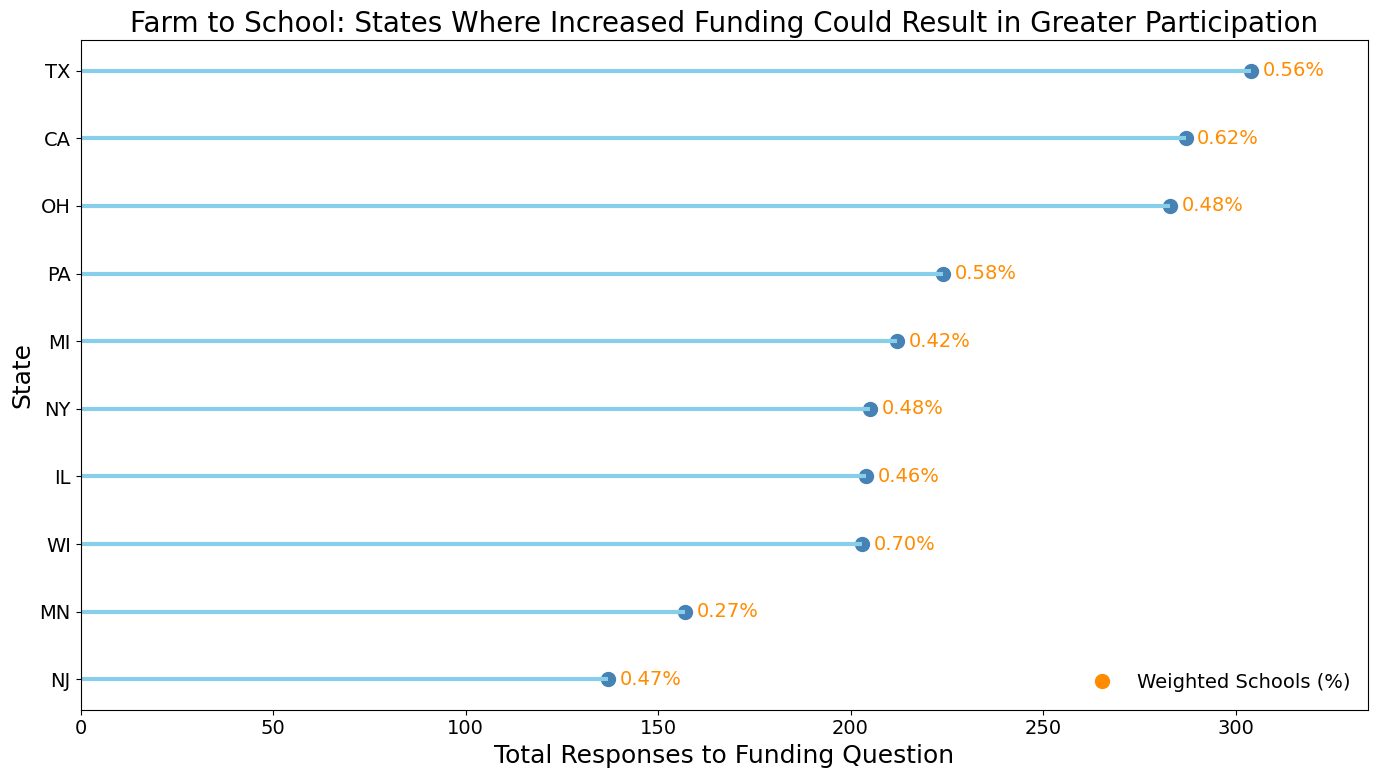

In [50]:

#Sort top10 states by total responses
top10_sorted = top10_with_weight.sort_values('total_responses', ascending=True)

plt.figure(figsize=(14,8))
plt.rcParams.update({
    'font.size': 14,         
    'axes.titlesize': 20,   
    'axes.labelsize': 18,    
    'xtick.labelsize': 14,  
    'ytick.labelsize': 14  
})

#Stems
plt.hlines(
    y=top10_sorted['SFA_STATE'], 
    xmin=0, 
    xmax=top10_sorted['total_responses'], 
    color='skyblue', 
    linewidth=3
)

#Dots at the end of stems
plt.scatter(
    top10_sorted['total_responses'], 
    top10_sorted['SFA_STATE'], 
    color='steelblue', 
    s=100
)

#Add weighted schools percentages as text next to the dots
for x, y, weight in zip(top10_sorted['total_responses'], top10_sorted['SFA_STATE'], top10_sorted['weighted_schools']):
    plt.text(
        x + 3,
        y,
        f"{weight:.2f}%", 
        va='center',
        fontsize=14,
        color='darkorange'
    )

legend_elements = [
    Line2D([0], [0], color='darkorange', marker='o', linestyle='None',
           markersize=10, label="Weighted Schools (%)")
           
]

plt.legend(
    handles=legend_elements,
    loc='lower right',
    frameon=False
)

plt.xlabel("Total Responses to Funding Question")
plt.ylabel("State")
plt.title("Farm to School: States Where Increased Funding Could Result in Greater Participation")
plt.xlim(0, top10_sorted['total_responses'].max() * 1.1) 
plt.tight_layout()
plt.show()